In [1]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os
import yaml
#from dotenv import load_dotenv

import Mandelbrot #defined/customized functions from Mandelbrot.py

import scipy
from scipy.stats import norm, cauchy, lognorm, expon, kstest



In [2]:
MIN = Mandelbrot.process_csv(gran="min")
HOUR = Mandelbrot.process_csv(gran="hour")
DAY = Mandelbrot.process_csv(gran="day")
WEEK = Mandelbrot.process_csv(gran="week")
MONTH = Mandelbrot.process_csv(gran="month")

# Hurst exponent


H shows longterm trends in timeseries (longterm memory)

H = 0.5 : random walk (brownian motion)
H < 0.5 : mean reverting (zigzack motion, change in trend)
H > 0.5 : presistence of the current trend (following the current trends of up or downward movement)


## 2 Methods of estimating H


### Rescaled Range analysis (R/S Analysis)

divide dataset in subsets
calculate cum std from mean
calculate difference of cum std (Max-Min) (R)
calculate std (S)

plot (log(R/S))/log(n) (for different n)
slope == Hurst exponent


### Detrended Fluctuation Analysis (DFA)

(more robust for trends)






In [3]:
data = DAY["high"]
len(data)

3393

In [19]:
np.cumsum?

In [4]:
a = [1,2,3]
np.sum(a[0:1])

1

In [23]:
#R/S approach step by step (fixed window)

#select a segmentlenth (l) and divide data in n substes of length l
#dive by the power of 2

#define chunk size (by the power of two)
power=5
l = 2**power         #length of subsets
n = int(len(data)/l)      #number of subsets

print(f"data gets divided into {n} subsets of length {l}")

R_S_per_segment = []   #list of R/S for each segment 

#for k in range(0,n):
for k in range(0,n):
    print("---------------------------------------------------------------------------------------------")
    print(f"calculating for the {k}.segment")
    index_range = [k*l,((k+1)*l)]
    print(f"calculating for index {index_range[0]} to {index_range[1]}")
    #get the mean
    mean = np.average(data[index_range[0]:index_range[1]])
    #get the standartdeviation
    std = np.std(data[index_range[0]:index_range[1]])
    print("mean:",mean,"std:",std)
    #get a centralized subset (mean substracted from each datapoint)
    Y = []
    for i in range(index_range[0],index_range[1]):
        y = data[i]-mean
        Y.append(y)
    #print("raw data:")
    #print(data[index_range[0]:index_range[1]])
    #print("centralized data (mean substracted):")
    #print(Y)
    
    #get the cumulative sum of Y
    Y_cumsum = []
    for j in range(1,len(Y)+1):
        y_cumsum = np.sum(Y[0:j])
        Y_cumsum.append(y_cumsum)
        
    print("cumulative sum of centralized data:", Y_cumsum)
    
    print(len(Y_cumsum),len(Y_cumsum_2))
    
    #calculate Range of the cumulative sum
    R = np.max(Y_cumsum)-np.min(Y_cumsum)
    print("the range of the cumulative sum is:", R)
    
    #calculate rescaled Range (is calculated per subset k)
    R_S = R/std
    R_S_per_segment.append(R_S)
    print(f"the rescaled Range of segment {k} is:", R_S)
    
    
    
# get the mean of the R/S for all segments of the length l
R_S_mean = np.average(R_S_per_segment)
Hurst = np.log(R_S_mean)/np.log(l)

print(f"The average rescaled Range for the segments of lenth {l} is:",R_S_mean)
print(f"The Hurst exponent for the segments of lenth {l} is:",Hurst)
    
    

#Repeat for different subsets lengths l and calculate the R_S mean
    

    





data gets divided into 106 subsets of length 32
---------------------------------------------------------------------------------------------
calculating for the 0.segment
calculating for index 0 to 32
mean: 311.5562572479248 std: 21.964691642719462
cumulative sum of centralized data: [49.912248611450195, 93.86139297485352, 113.24184226989746, 131.66376495361328, 141.61202430725098, 146.52488327026367, 178.673002243042, 206.42430114746088, 226.31271553039545, 240.09593582153315, 249.16968345642084, 253.82302093505854, 245.53473854064936, 243.54061508178705, 242.208662033081, 235.34494018554682, 223.14274787902826, 202.82660293579096, 164.38341331481928, 127.3967666625976, 84.65746498107904, 51.20826339721674, 41.343656539916935, 25.069229125976506, 4.334291458129826, -7.180034637451286, -6.819513320922965, 5.43892669677723, 11.974405288696119, 11.184932708740064, 1.7984752655027592, -1.7053025658242404e-13]
32 32
the range of the cumulative sum is: 261.0030555725098
the rescaled Range 

In [26]:
#all the steps above are condensed is a small function:


def hurst_exponent(data,power=5):
    l = 2**power         #length of subsets
    n = int(len(data)/l)      #number of subsets
    print(f"data gets divided into {n} subsets of length {l}")
    
    R_S_per_segment = [] 
    
    for k in range(0,n):
        index_range = [k*l,((k+1)*l)]
        subset = data[index_range[0]:index_range[1]]
    
        mean = np.average(data[index_range[0]:index_range[1]])
        std = np.std(subset)
        Y_cumsum = np.cumsum(subset- np.mean(subset))
        
        R = np.max(Y_cumsum)-np.min(Y_cumsum)
        R_S = R/std
        
        R_S_per_segment.append(R_S)
        
    
    R_S_mean = np.average(R_S_per_segment)
    Hurst = np.log(R_S_mean)/np.log(l)
    
    return Hurst, l



In [25]:
H, l = hurst_exponent(data)
print(R_S_)

data gets divided into 106 subsets of length 32
12.420002714498308


In [31]:
def hurst_fixed_window(data,power=[2,10]):
    
    H = []
    L = []
    
    for p in range(power[0],power[1]+1):
        h,l = hurst_exponent(data, power=p)
        
        H.append(h)
        L.append(l)
        
    return H,L

In [32]:
H,L = hurst_fixed_window(data)

data gets divided into 848 subsets of length 4
data gets divided into 424 subsets of length 8
data gets divided into 212 subsets of length 16
data gets divided into 106 subsets of length 32
data gets divided into 53 subsets of length 64
data gets divided into 26 subsets of length 128
data gets divided into 13 subsets of length 256
data gets divided into 6 subsets of length 512
data gets divided into 3 subsets of length 1024


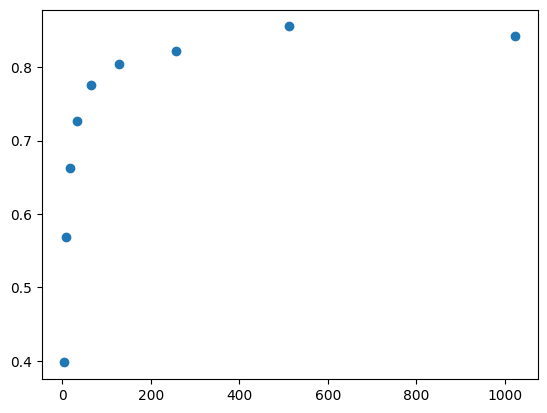

In [36]:
plt.scatter(L,H)
plt.show()

In [ ]:
def hurst_rolling_window():